<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/OpenVision_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

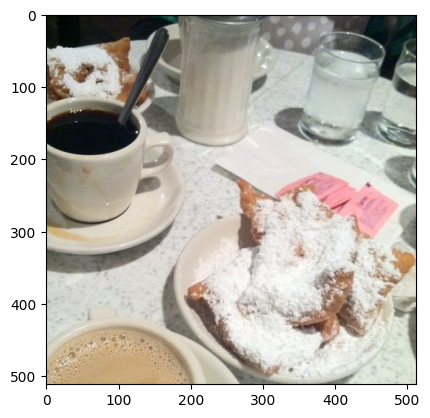

<ipython-input-12-27340cc3267b>:34: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


Label probs: tensor([[1.2295e-03, 1.0932e-03, 3.9401e-04, 9.9728e-01]])


In [12]:
import torch
import torch.nn.functional as F
from urllib.request import urlopen
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# ⚠️ Use our repo's tokenizer implementation at src/convert_upload/open_clip/
from open_clip import create_model_from_pretrained, get_tokenizer

model, preprocess = create_model_from_pretrained('hf-hub:UCSC-VLAA/openvision-vit-large-patch14-224')
tokenizer = get_tokenizer('hf-hub:UCSC-VLAA/openvision-vit-large-patch14-224')

image = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

# Display Image
img = image
#to_pil = ToPILImage()
#img = to_pil(img)
# Convert to RGB format before displaying
img = img.convert("RGB")
img_array = np.array(img) / 255.0  # Convert to numpy array and normalize
plt.imshow(img_array)
plt.show()

image = preprocess(image).unsqueeze(0)


text = tokenizer(["a diagram", "a dog", "a cat", "a beignet"], context_length=model.context_length)

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features = F.normalize(image_features, dim=-1)
    text_features = F.normalize(text_features, dim=-1)

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs)  # prints: [[0., 0., 0., 1.0]]